In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data prior to your 
#trips start date and plot the results
session.query(func.count(Measurement.date)).all()
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-04-20').\
    order_by(Measurement.date).all()
print(results)

[('2016-04-21', 0.0), ('2016-04-21', 0.01), ('2016-04-21', 0.02), ('2016-04-21', None), ('2016-04-21', 0.0), ('2016-04-21', 0.0), ('2016-04-21', 0.14), ('2016-04-22', 0.0), ('2016-04-22', 0.0), ('2016-04-22', 0.0), ('2016-04-22', None), ('2016-04-22', 0.0), ('2016-04-22', 0.07), ('2016-04-22', 0.23), ('2016-04-23', 0.05), ('2016-04-23', 0.21), ('2016-04-23', 0.1), ('2016-04-23', 0.04), ('2016-04-23', 0.23), ('2016-04-23', 0.77), ('2016-04-24', 0.05), ('2016-04-24', 0.11), ('2016-04-24', 0.01), ('2016-04-24', 0.29), ('2016-04-24', 0.21), ('2016-04-24', 0.99), ('2016-04-25', 0.0), ('2016-04-25', 0.06), ('2016-04-25', 0.0), ('2016-04-25', None), ('2016-04-25', 0.0), ('2016-04-25', 0.03), ('2016-04-26', 0.0), ('2016-04-26', 0.01), ('2016-04-26', 0.01), ('2016-04-26', None), ('2016-04-26', 0.0), ('2016-04-26', 0.01), ('2016-04-26', None), ('2016-04-27', 0.0), ('2016-04-27', 0.05), ('2016-04-27', 0.1), ('2016-04-27', None), ('2016-04-27', 0.0), ('2016-04-27', 0.01), ('2016-04-27', 0.15), ('2

In [14]:
# Perform a query to retrieve the date and prcp values
data1 = {'date': [], 'prcp': []}
for row in results:
    data1['date'].append(row.date)
    data1['prcp'].append(row.prcp)
    
HI_prec = pd.DataFrame(data1, columns = ['date','prcp'])
HI_prec.head(10)


,date,prcp
0,2016-04-21,0.00
1,2016-04-21,0.01
2,2016-04-21,0.02
3,2016-04-21,NaN
4,2016-04-21,0.00
5,2016-04-21,0.00
6,2016-04-21,0.14
7,2016-04-22,0.00
8,2016-04-22,0.00
9,2016-04-22,0.00


In [15]:
# Sort the dataframe by date
HI_prec = HI_prec.dropna()
HI_prec.head(10)

,date,prcp
0,2016-04-21,0.00
1,2016-04-21,0.01
2,2016-04-21,0.02
4,2016-04-21,0.00
5,2016-04-21,0.00
6,2016-04-21,0.14
7,2016-04-22,0.00
8,2016-04-22,0.00
9,2016-04-22,0.00
11,2016-04-22,0.00


In [16]:
#setting index
HI_prec.set_index("date",drop=True,inplace=True)
HI_prec.head()

,prcp
date,
2016-04-21,0.00
2016-04-21,0.01
2016-04-21,0.02
2016-04-21,0.00
2016-04-21,0.00


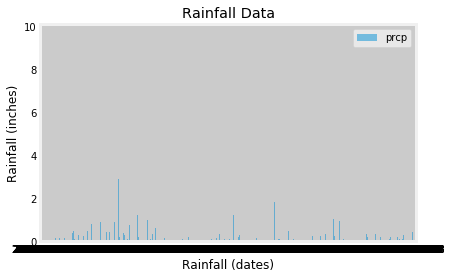

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
HI_prec.plot(kind='bar',align='center', alpha=0.5,rot=0)
plt.xlabel("Rainfall (dates)")
plt.ylabel("Rainfall (inches)")
plt.title('Rainfall Data')


plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
HI_prec.describe()

,prcp
count,2713.000000
mean,0.195142
std,0.520761
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,9.640000


In [27]:
# How many stations are available in this dataset?
station = session.query(func.count(Station.station)).all()
print(station_count)

[(9,)]


In [30]:
# What are the most active stations?
# List the stations and the counts in descending order.
most_active_stations = engine.execute("SELECT count(station), station FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()
most_active_stations

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
mostactivestations_df = pd.DataFrame(most_active_stations)
mostactivestations_df = mostactivestations_df.rename(columns={0:"Active Count",1:"Station Name"})
mostactivestations_df.head()

,Active Count,Station Name
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128


In [2]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data previous to your 
# trips start date for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

